In [ ]:
#Proyecto Capstone Análisis de datos 
#2022 – unico integrante: Ricardo Ovando
#■ tema a analizar: Precios de casas, dataset ames housing
#■ problema específico: predecir precios de las casas en ames iowa,usando 
#multiples variables, y descubrir a través del análisis cuales son las variables 
#principales para generar el modelo
#■ La variable que se quiere predecir: predecir los precios en el año 2023.

#parte 1: limpieza de los datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:

df= pd.read_csv('https://raw.githubusercontent.com/rovandof/capstone-add-udd/main/ames.csv')
df.head()



,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.info


<bound method DataFrame.info of       Order        PID  MS.SubClass MS.Zoning  Lot.Frontage  Lot.Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Al

In [ ]:
#analisis de outliers

In [4]:
#corr() se usa para encontrar la correlación por pares de todas las columnas en el marco de datos y luego hago un sort
#para ordenar los datos
#podemos ver que las ultimas columnas (las que tienen una mayor correlacion con saleprice) 
#son Gr.Liv.Area y Overall.Qual
pd.DataFrame([df.corr()['SalePrice'].sort_values()])

,PID,Enclosed.Porch,Kitchen.AbvGr,Overall.Cond,MS.SubClass,Low.Qual.Fin.SF,Bsmt.Half.Bath,Order,Yr.Sold,Misc.Val,...,Year.Remod.Add,Full.Bath,Year.Built,X1st.Flr.SF,Total.Bsmt.SF,Garage.Area,Garage.Cars,Gr.Liv.Area,Overall.Qual,SalePrice
SalePrice,-0.246521,-0.128787,-0.119814,-0.101697,-0.085092,-0.03766,-0.035835,-0.031408,-0.030569,-0.015691,...,0.532974,0.545604,0.558426,0.621676,0.63228,0.640401,0.647877,0.70678,0.799262,1.0


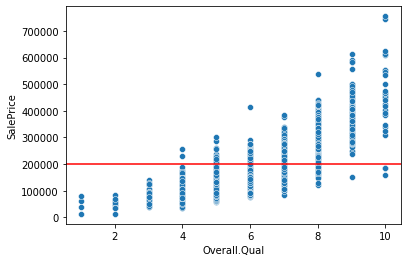

In [26]:
#graficando el precio de venta vs calidad general de la vivienda
sns.scatterplot(data=df, x='Overall.Qual', y='SalePrice')
plt.axhline(y=200000,color='r')

In [27]:
#podemos ver en el grafico que hay outliers en las calidades 9 y 10, bajo el precio de venta de 200000 doalres
df[(df['Overall.Qual']>8) &(df['SalePrice']<200000)][['SalePrice', 'Overall.Qual']]


,SalePrice,Overall.Qual
1182,150000,9
1498,160000,10
2180,183850,10
2181,184750,10


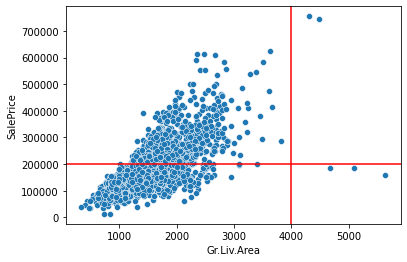

In [28]:
#graficando el precio de venta vs gross living area (espacio total de la vivienda)

sns.scatterplot(x='Gr.Liv.Area', y='SalePrice', data=df)
plt.axhline(y=200000, color='r')
plt.axvline(x=4000, color='r')

In [30]:
#podemos ver en el grafico que hay outliers sobre el tamaño de 4000 pies cuadrados, bajo el precio de venta de 200000 doalres
df[(df['Gr.Liv.Area']>4000) & (df['SalePrice']<200000)][['SalePrice', 'Gr.Liv.Area']]


,SalePrice,Gr.Liv.Area
1498,160000,5642
2180,183850,5095
2181,184750,4676


In [14]:
df_total=df


In [ ]:
#sacando los outliers del dataset

In [31]:
index_drop=df[(df['Gr.Liv.Area']>4000) & (df['SalePrice']<200000)].index
df=df.drop(index_drop, axis=0)

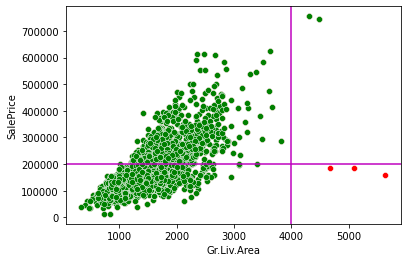

In [32]:
sns.scatterplot(x='Gr.Liv.Area', y='SalePrice', data=df_total, color='red')

sns.scatterplot(x='Gr.Liv.Area', y='SalePrice', data=df, color='green')
plt.axhline(y=200000, color='m')
plt.axvline(x=4000, color='m')

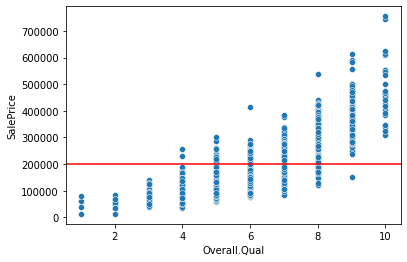

In [33]:
sns.scatterplot(x='Overall.Qual', y='SalePrice', data=df)
plt.axhline(y=200000,color='r')

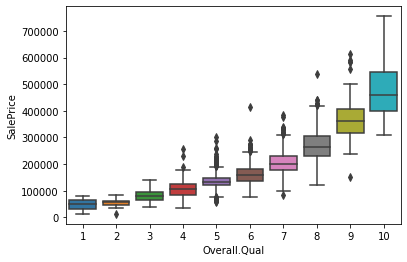

In [34]:
sns.boxplot(x='Overall.Qual', y='SalePrice', data=df)


In [ ]:
#ahora revisando data faltante

In [35]:
df.head()


,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
#podemos sacar la columna pid porque ya existe un index asi que no necesitamos otro indice

In [36]:
df= df.drop('PID', axis=1)


In [37]:
df.isnull()


,Order,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,False,True,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [40]:
#calculando los porcentajes de data faltante
nan_percent= 100*(df.isnull().sum()/len(df))
nan_percent= nan_percent[nan_percent>0].sort_values()
nan_percent



Electrical         0.034165
Garage.Area        0.034165
Total.Bsmt.SF      0.034165
Bsmt.Unf.SF        0.034165
BsmtFin.SF.1       0.034165
BsmtFin.SF.2       0.034165
Garage.Cars        0.034165
Bsmt.Full.Bath     0.068329
Bsmt.Half.Bath     0.068329
Mas.Vnr.Area       0.785787
Mas.Vnr.Type       0.785787
BsmtFin.Type.1     2.733174
Bsmt.Qual          2.733174
Bsmt.Cond          2.733174
BsmtFin.Type.2     2.767339
Bsmt.Exposure      2.835668
Garage.Type        5.363854
Garage.Finish      5.432183
Garage.Qual        5.432183
Garage.Cond        5.432183
Garage.Yr.Blt      5.432183
Lot.Frontage      16.740690
Fireplace.Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc.Feature      96.412709
Pool.QC           99.590024
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

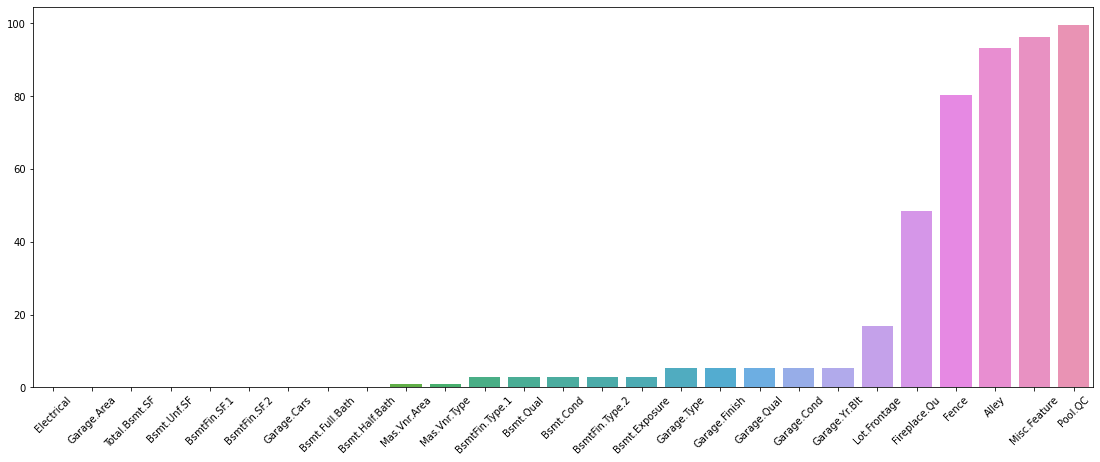

In [42]:
#graficando para revisar que columnas tienen la mayor cantidad de data faltante
plt.figure(figsize=(19,7))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=45)

(0.0, 1.0)

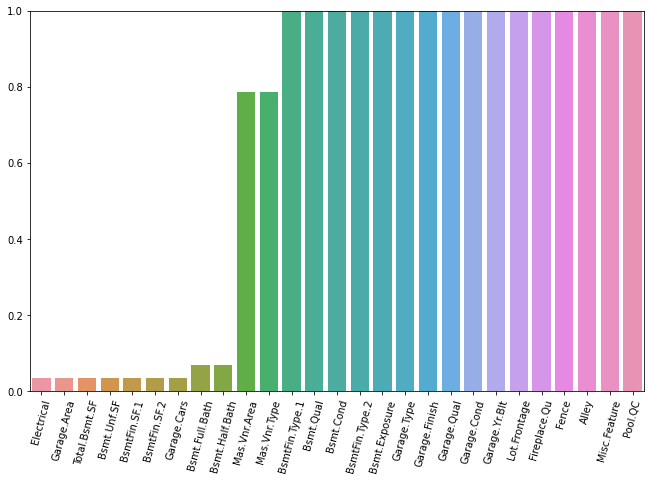

In [43]:
#ahora hay que lidiar con la data faltante en las columnas que tengan mayor cantidad de data perdida
#seleccionar columnas que tengan data perdida mayor al 1 por ciento
plt.figure(figsize=(11,7))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=75)
plt.ylim(0,1)

In [44]:
#mostrando columnas con cantidad de data perdida menor al 1%
nan_percent[nan_percent < 1]

Electrical        0.034165
Garage.Area       0.034165
Total.Bsmt.SF     0.034165
Bsmt.Unf.SF       0.034165
BsmtFin.SF.1      0.034165
BsmtFin.SF.2      0.034165
Garage.Cars       0.034165
Bsmt.Full.Bath    0.068329
Bsmt.Half.Bath    0.068329
Mas.Vnr.Area      0.785787
Mas.Vnr.Type      0.785787
dtype: float64

In [45]:
df[df['Electrical'].isnull()]


,Order,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
1577,1578,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [47]:
df[df['Garage.Area'].isnull()]

,Order,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
2236,2237,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [ ]:
#removiendo filas con nulos

In [49]:
df= df.dropna(axis=0, subset=['Electrical', 'Garage.Area'])

(0.0, 1.0)

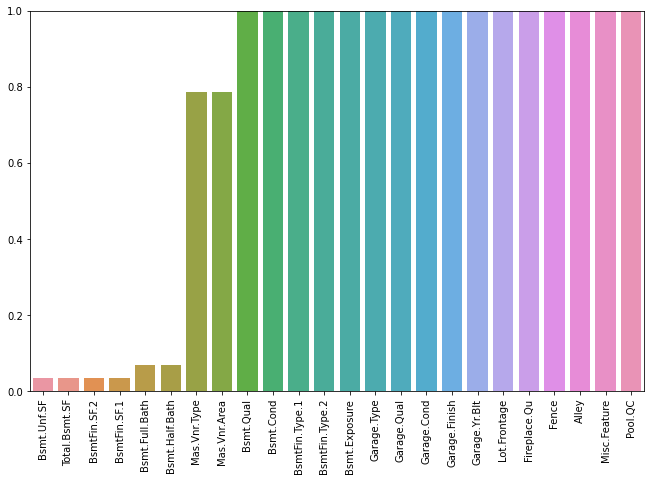

In [50]:
nan_percent= 100*(df.isnull().sum()/len(df))
nan_percent= nan_percent[nan_percent>0].sort_values()

plt.figure(figsize=(11,7))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [ ]:
#llenando los valores que no estan

df[df['Total.Bsmt.SF'].isnull()]

In [ ]:
df[df['Bsmt.Half.Bath'].isnull()]

In [ ]:
df[df['Bsmt.Full,Bath'].isnull()]

In [ ]:
#si estos valores de basement (sotano) estan vacios puede ser simplemente porque la casa no tiene sotano, asi que
#rellenare los valores con vacios

In [51]:
#columna de numeros se llenan con cero
bsmt_num_cols= ['BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF','Total.Bsmt.SF' ,'Bsmt.Full.Bath', 'Bsmt.Half.Bath']
df[bsmt_num_cols]=df[bsmt_num_cols].fillna(0)

#columnas string se llenan con None
bsmt_str_cols= ['Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.Type.2']
df[bsmt_str_cols]= df[bsmt_str_cols].fillna('None')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(0.0, 1.0)

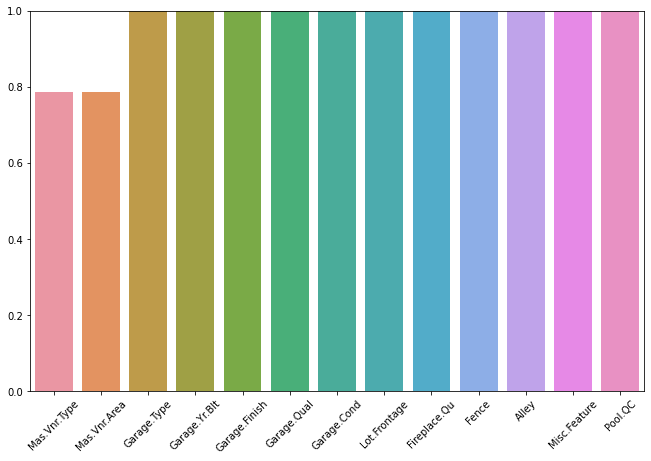

In [53]:
#ahora van quedando menos columnas con cantidad significativa de valores que faltan
nan_percent= 100*(df.isnull().sum()/len(df))
nan_percent= nan_percent[nan_percent>0].sort_values()

plt.figure(figsize=(11,7))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=45)
plt.ylim(0,1)

In [54]:
#google dice que mas.vnr = Masonry veneer area, es un termino de construccion
#un tipo de recubrimiento de ladrillo, sino lo tiene puede perfectamente venir nulo, asi 
#que lo puedo reemplazar por cero

df["Mas.Vnr.Type"]= df["Mas.Vnr.Type"].fillna("None")
df["Mas.Vnr.Area"]= df["Mas.Vnr.Area"].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

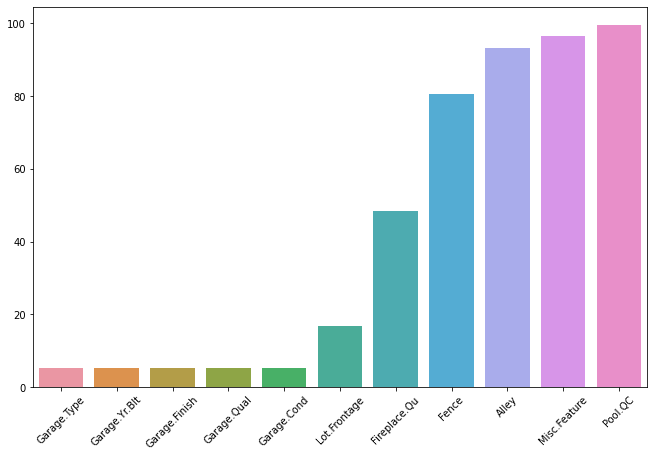

In [55]:
#revisando que columnas con datos sin llenar nos quedan...
nan_percent= 100*(df.isnull().sum()/len(df))
nan_percent= nan_percent[nan_percent>0].sort_values()

plt.figure(figsize=(11,7))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=45)

In [56]:
df[['Garage.Type', 'Garage.Yr.Blt', 'Garage.Finish', 'Garage.Qual', 'Garage.Cond']]

,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Qual,Garage.Cond
0,Attchd,1960.0,Fin,TA,TA
1,Attchd,1961.0,Unf,TA,TA
2,Attchd,1958.0,Unf,TA,TA
3,Attchd,1968.0,Fin,TA,TA
4,Attchd,1997.0,Fin,TA,TA
...,...,...,...,...,...
2925,Detchd,1984.0,Unf,TA,TA
2926,Attchd,1983.0,Unf,TA,TA
2927,NaN,NaN,NaN,NaN,NaN
2928,Attchd,1975.0,RFn,TA,TA


In [57]:
#lo mismo de lo anterior, si no hay datos en las columnas de garage, puede significar
#que la casa no tiene garaje, asi que lo rellenamos con 0 y None
columnas= ['Garage.Type', 'Garage.Finish', 'Garage.Qual', 'Garage.Cond']
df[columnas]=df[columnas].fillna('None')

df['Garage.Yr.Blt']=df['Garage.Yr.Blt'].fillna(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

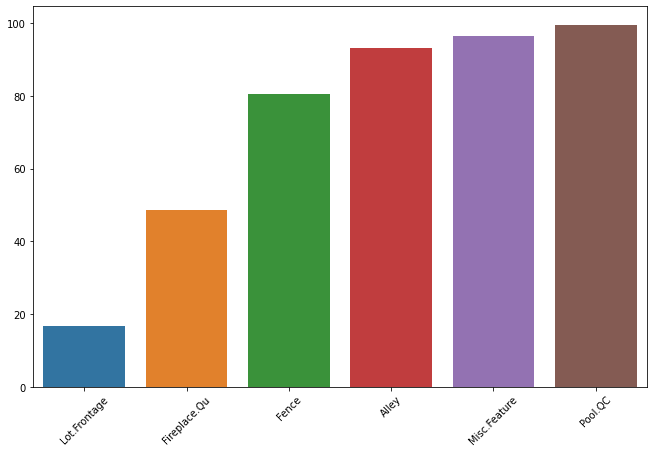

In [58]:
#revisando que columnas nos queda por analizar
nan_percent= 100*(df.isnull().sum()/len(df))
nan_percent= nan_percent[nan_percent>0].sort_values()

plt.figure(figsize=(11,7))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=45)

In [59]:
df[['Lot.Frontage', 'Fireplace.Qu', 'Fence', 'Alley', 'Misc.Feature',
       'Pool.QC']]

,Lot.Frontage,Fireplace.Qu,Fence,Alley,Misc.Feature,Pool.QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2925,37.0,NaN,GdPrv,NaN,NaN,NaN
2926,NaN,NaN,MnPrv,NaN,NaN,NaN
2927,62.0,NaN,MnPrv,NaN,Shed,NaN
2928,77.0,TA,NaN,NaN,NaN,NaN


In [61]:
#hay varias columnas creo que poco relevantes, que indica si tiene o no una cerca, un callejon, una piscina o una feature miscelanea
df= df.drop(['Fence', 'Alley', 'Misc.Feature','Pool.QC'], axis=1)
#asi que las borrare

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

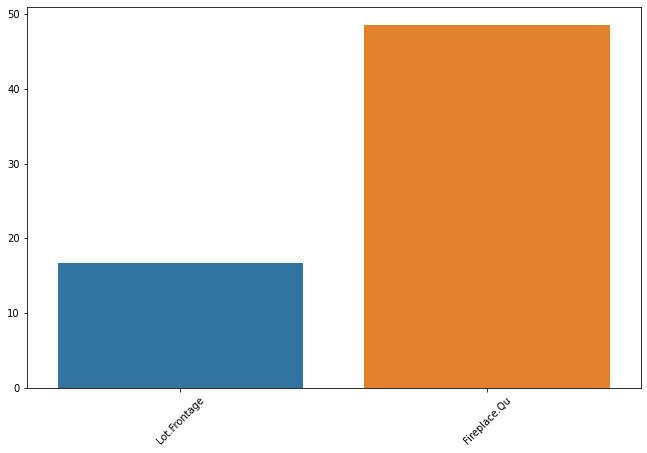

In [62]:
#viendo que columnas queda por analizar
nan_percent= 100*(df.isnull().sum()/len(df))
nan_percent= nan_percent[nan_percent>0].sort_values()

plt.figure(figsize=(11,7))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=45)

In [64]:
#llenando la columna de calidad de la chimenea, si no tiene valor sera none, porque puede no tener chimenea
df['Fireplace.Qu']= df['Fireplace.Qu'].fillna('None')


In [65]:
#segun google el campo que queda analizar es lot frontage, que es la cantidad de la propiedad que esta adyacente a una calle
#como esto no es posible descartarlo, porque aun no sabemos las importancia de cada featura, la opcion
#mas sensible es aplicar un promedio del frontage lot del vecindario

df.groupby('Neighborhood')['Lot.Frontage'].transform(lambda val: val.fillna(val.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2925     37.000000
2926     75.144444
2927     62.000000
2928     77.000000
2929     74.000000
Name: Lot.Frontage, Length: 2925, dtype: float64

In [69]:
#asignando al campo
df['Lot.Frontage']=df.groupby('Neighborhood')['Lot.Frontage'].transform(lambda valor: valor.fillna(valor.mean()))
#asignando un 0 a los que aun asi tengan valor vacio
df['Lot.Frontage']= df['Lot.Frontage'].fillna(0)


In [73]:
nan_percent= 100*(df.isnull().sum()/len(df))
nan_percent= nan_percent[nan_percent>0].sort_values()
nan_percent

#podemos ver que ya no nos quedan valores pendientes

Series([], dtype: float64)

In [76]:
#trabajando las variables categoricas (convirtiendo)

df['MS.SubClass']= df['MS.SubClass'].apply(str)



In [77]:
#listado las columnas 
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   MS.SubClass      2925 non-null   object 
 2   MS.Zoning        2925 non-null   object 
 3   Lot.Frontage     2925 non-null   float64
 4   Lot.Area         2925 non-null   int64  
 5   Street           2925 non-null   object 
 6   Lot.Shape        2925 non-null   object 
 7   Land.Contour     2925 non-null   object 
 8   Utilities        2925 non-null   object 
 9   Lot.Config       2925 non-null   object 
 10  Land.Slope       2925 non-null   object 
 11  Neighborhood     2925 non-null   object 
 12  Condition.1      2925 non-null   object 
 13  Condition.2      2925 non-null   object 
 14  Bldg.Type        2925 non-null   object 
 15  House.Style      2925 non-null   object 
 16  Overall.Qual     2925 non-null   int64  
 17  Overall.Cond  

In [80]:
#creando variables dummy
df_num= df.select_dtypes(exclude="object")
df_obj= df.select_dtypes(include="object")
df_obj= pd.get_dummies(df_obj, drop_first=True)



In [81]:
df_final = pd.concat([df_num, df_obj], axis=1)

In [83]:
#ahora exportamos a csv en processed
df_final.to_csv('df_paso1.csv', encoding='utf-8')
